# Demo of the Fourier uncertainty principle: 
#### *The trade-off between time resolution and frequency resolution*

This demo illustrates the trade-off between the time resolution of a spectral analysis and its ability to resolve activity at different frequencies, known as the Fourer (or Heisenberg) uncertainty principle. In brief, using a longer time segment for estimating a spectrum results in better resolution of the spectrum, compared to using shorter segments. That is, more refined spectral information is available when using a longer segment. But because the spectrum integrates across time points, using longer time segments also means less temporal specificity of the spectrum. 

In [4]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt
import scipy.io as sio
import scipy.signal as sig
import scipy.fft as fft

### Part 1: Representing a narrow-band signal in the DFT amplitude spectrum 

Narrow-band signals are often related to artifacts, or are experimenter-generated brain responses at fixed rate such as the steady-state potential, driven by foxed rate modulation of a stimulus train. Because their exact frequency is known and their quantification often occurs in the frequency domain, they are a great example to illustrate some of the issues that come with the uncertainty principle. 

We start by making a discrete time vector, digitizing the simulated data at 1000 samples per second, i.e. a sample rate of 1000 Hz. 


In [5]:
time = np.linspace(0.001,5, 5000) # Five seconds of discrete time, sampled at 1000 Hz
time.shape

(5000,)

Now, a Brownian noise (biorealistic) time series not unlike EEG/LFP, representing one trial of neural mass data


In [6]:
temp=np.random.uniform(low=0.0, high=1.0, size=(5000))-0.5 # zero-centered white noise
brownsig = np.cumsum(temp) # Brownian noise is the cumulative sum of white noise

Now, add 10.8 Hz sine wave to the Brownian noise. Note that the 10.8 Hz signal is relatively small and is not easily detected in the time domain data, with the unaided eye. Thus, its waveform shape or time ranges of interest would also be difficult to identify just by looking at the data. Thus, we will conduct DFT later. 


Text(0.5, 1.0, 'The Brownian noise plus the 10.8 Hz sine wave')

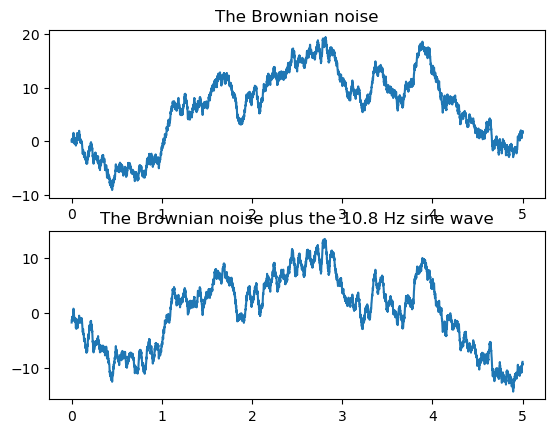

In [7]:
SinWave = np.sin(2 * np.pi * time * 10.8) #a 10.8 Hz sine wave with amplitude 1
testsig2  = brownsig - np.mean(brownsig) # zero-centered Brownian noise
testsig1 = testsig2 + SinWave # add the sine wave
testsig = sig.detrend(testsig1); # detrend

fig,ax = plt.subplots(2,1)
plt.subplot(2, 1, 1)
plt.plot(time, brownsig)
plt.title('The Brownian noise') # the real part
plt.subplot(2, 1, 2)
plt.plot(time, testsig)
plt.title('The Brownian noise plus the 10.8 Hz sine wave') 

Next, we compute the Discrete Fourier Transform, resulting in a complex spectrum with real (cosine-base) and imaginary (sine-base) components, then we plot the amplitude spectrum. Note the pronounced 1/f shape of the spectrum, with lower frequencies showing higher amplitude. 


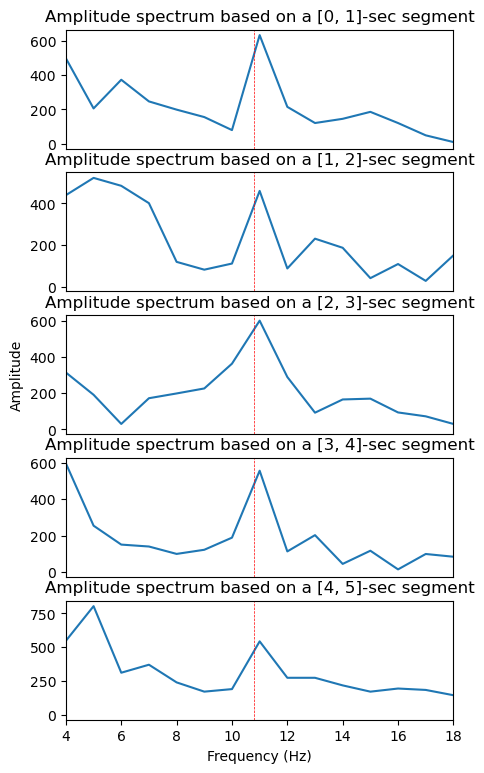

In [8]:
array = np.arange(5000)  # Create a numpy 1D array of 5000 points
fig,ax = plt.subplots(5,1)

step_size = 1000
for index, start in enumerate(range(0, len(array), step_size)):
    end = start + step_size
    segment = array[start:end]
    complexspectrum = fft.fft(testsig[segment-1])
    faxis = fft.fftfreq(len(segment), 1/1000)
    amplitudespec = complexspectrum/len(segment) # normalized amplitude spectrum
    plt.subplot(5, 1, index+1)
    plt.subplots_adjust(top=0.8)  # Adjust the top margin (increase the value for more space)
    plt.plot(faxis[3:100], abs(complexspectrum[3:100]))
    ax[index].set_xlim(4, 18)  # Set the x-axis limits to the range 4 to 18
    plt.title('Amplitude spectrum based on a {}-sec segment'.format([index,index+1]))
    plt.axvline(10.8, color='r', linestyle='--',linewidth=0.5)

    if index < 4:
        plt.xticks([]) # Remove the x-axis tick marks for all but the bottom plot 
    else:
        ax[-1].set_xlabel('Frequency (Hz)')

ax[2].set_ylabel('Amplitude')
#plt.tight_layout()  # Improves the spacing between subplots
fig.set_size_inches(5,10)
plt.show()


Plot the spectra again, but zoomed in, for better visualization of the 10.8 Hz signal. 

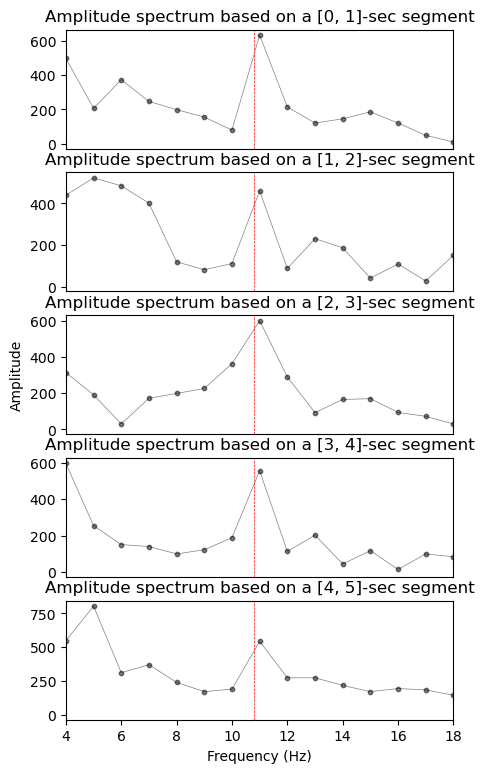

In [9]:
array = np.arange(5000)  # Create a numpy 1D array of 5000 points
fig,ax = plt.subplots(5,1)

step_size = 1000
for index, start in enumerate(range(0, len(array), step_size)):
    end = start + step_size
    segment = array[start:end]
    complexspectrum = fft.fft(testsig[segment-1])
    faxis = fft.fftfreq(len(segment), 1/1000)
    amplitudespec = complexspectrum/len(segment) # normalized amplitude spectrum
    plt.subplot(5, 1, index+1)
    plt.subplots_adjust(top=0.8)  # Adjust the top margin (increase the value for more space)
    plt.plot(faxis[3:100], abs(complexspectrum[3:100]), linewidth=0.5, color='k', linestyle='-',alpha=0.5)
    plt.scatter(faxis[3:100], abs(complexspectrum[3:100]), s=10, color='k', marker='o',alpha=0.5)
    ax[index].set_xlim(4, 18)  # Set the x-axis limits to the range 4 to 18
    plt.title('Amplitude spectrum based on a {}-sec segment'.format([index,index+1]))
    plt.axvline(10.8, color='r', linestyle='--',linewidth=0.5)

    if index < 4:
        plt.xticks([]) # Remove the x-axis tick marks for all but the bottom plot 
    else:
        ax[-1].set_xlabel('Frequency (Hz)')

ax[2].set_ylabel('Amplitude')
#plt.tight_layout()  # Improves the spacing between subplots
fig.set_size_inches(5,10)
plt.show()


Note that with increasing duration of the segment entered into DFT, the spectrum becomes more fine-grained. It is also clear from the above that the 10.8 Hz narrow band signal (vertical red line) is best captured by the 5 second time window , where the frequency resolution (the distance of the bins on the x-axis) is 1/5 = 0.2 Hz. With the other segment lengths, there is no x-tick that corresponds to 10.8 Hz. For example, with a 3 second window, the resolution is 1/3 = 0.33 Hz, and thus the spectrum will have bins at the following frequencies, none of which corresponds to 10.8 Hz:

In [75]:
import pandas as pd
from IPython.display import display, HTML

#frequencies = np.arange(1/3, 30.1, 1/3)

freq = np.linspace(1/3, 30., 90,endpoint=True)
print("frequencies (Hz) available in the spectrum based on a 3-second data segment (in 1/3 Hz increments):")

display(HTML(pd.DataFrame(np.round(freq,6).reshape(30,3),columns=['Δ 1/3 Hz','Δ 2/3 Hz','Δ 3/3 Hz']).to_html()))

frequencies (Hz) available in the spectrum based on a 3-second data segment (in 1/3 Hz increments):


,Δ 1/3 Hz,Δ 2/3 Hz,Δ 3/3 Hz
0,0.333333,0.666667,1.0
1,1.333333,1.666667,2.0
2,2.333333,2.666667,3.0
3,3.333333,3.666667,4.0
4,4.333333,4.666667,5.0
5,5.333333,5.666667,6.0
6,6.333333,6.666667,7.0
7,7.333333,7.666667,8.0
8,8.333333,8.666667,9.0
9,9.333333,9.666667,10.0


The absence of a bin at a given frequency will cause any narrow-band signal at that frequency to be represented at multiple other bins, typically the bins closest to the actual frequency. This is often called leaking, where spectral energy is showing up at frequencies other than the actual frequency, because of insufficient resolution of the spectrum. 

Once a signal is not well represented in a DFT amplitude spectrum, it is difficult to recover. One intution a researcher may have is that averaging several trial will help to improve the measurement, despite suboptimal choice of segment duration. This field tests this assumption using our example. Let's make 50 segments and average the spectra based on 1-sec segments. To make things more interesting, let's use a 10.5 Hz oscillation, in between the 10 and 11 Hz bins which are represented in a 1-sec spectrum. 

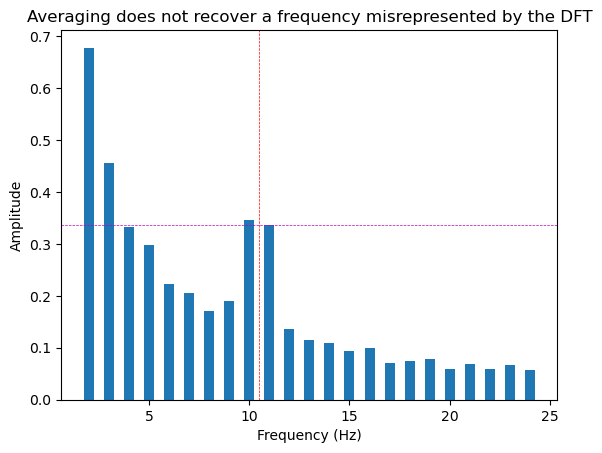

In [11]:
amplitudespec50 = np.zeros((50, 1000))
SinWave = np.sin(2*np.pi*time[0:1000]*10.5) # a 10.5 Hz sine wave
for trial in range(50):
    temp=np.random.uniform(low=0.0, high=1.0, size=(1000))-0.5
    brownsig = np.cumsum(temp) # Brownian noise is the cumulative sum of white noise
    testsig2  = brownsig - np.mean(brownsig) # zero-centered Brownian noise
    testsig1 = testsig2 + SinWave # add the sine wave
    testsig = sig.detrend(testsig1) # detrend
    complexspectrum = fft.fft((testsig[0:1000]))
    amplitudespec50[trial,:] = abs(complexspectrum/len(complexspectrum)) # normalized amplitude spectrum

faxis = fft.fftfreq(len(segment), 1/1000)
plt.bar(faxis[2:25], np.mean(amplitudespec50[:,2:25], axis=0), width=0.5)
plt.title('Averaging does not recover a frequency misrepresented by the DFT') #the absolute value (amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(10.5, color='r', linestyle='--',linewidth=0.5)
plt.axhline(np.mean(amplitudespec50[:, 11]), color='m', linestyle='--',linewidth=0.5)

It is apparent that averaging many trials with the 10.8 Hz signal misrepresented recovered some of the signal but it still fails to indicate its exact frequency. When aiming to measure a narrow band signal of interest, it is recommended to ensure that a frequency bin is located in the spectrum exactly at the frequency of interest. This can be ensured by calculating the wavelength (cycle duration) of the frequency of interest and using an integer multiple of that frequency. In our case: 


In [76]:
# the wavelength of 10.5 Hz oscillation
cycleduration = 1000/10.5 # in miliseconds
print('cycleduration: ',cycleduration)
# display the window length in miliseconds that result in spectra with a
# bin at 10.8 Hz
durationvector = np.arange(cycleduration,6000, cycleduration)
print(durationvector)

cycleduration:  95.23809523809524
[  95.23809524  190.47619048  285.71428571  380.95238095  476.19047619
  571.42857143  666.66666667  761.9047619   857.14285714  952.38095238
 1047.61904762 1142.85714286 1238.0952381  1333.33333333 1428.57142857
 1523.80952381 1619.04761905 1714.28571429 1809.52380952 1904.76190476
 2000.         2095.23809524 2190.47619048 2285.71428571 2380.95238095
 2476.19047619 2571.42857143 2666.66666667 2761.9047619  2857.14285714
 2952.38095238 3047.61904762 3142.85714286 3238.0952381  3333.33333333
 3428.57142857 3523.80952381 3619.04761905 3714.28571429 3809.52380952
 3904.76190476 4000.         4095.23809524 4190.47619048 4285.71428571
 4380.95238095 4476.19047619 4571.42857143 4666.66666667 4761.9047619
 4857.14285714 4952.38095238 5047.61904762 5142.85714286 5238.0952381
 5333.33333333 5428.57142857 5523.80952381 5619.04761905 5714.28571429
 5809.52380952 5904.76190476]


A 2-sec segment duration would capture the 10.5 Hz oscillation. 

Let's try out what difference this makes.

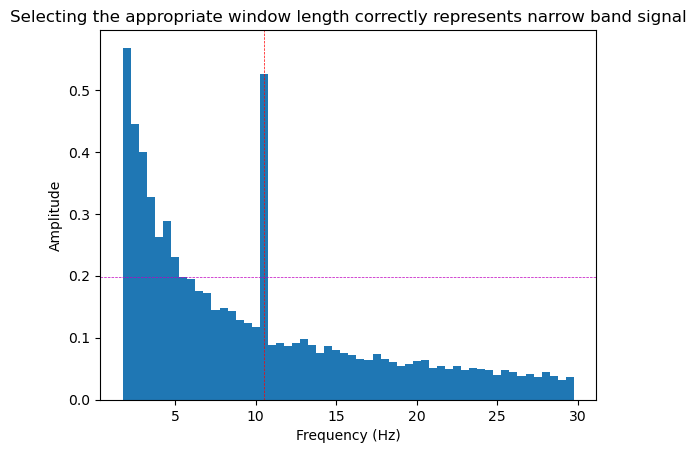

In [77]:
#time=np.arange(5000)
amplitudespec50 = np.zeros((50, 2000))
SinWave = np.sin(2*np.pi*time*10.5) # a 10.5 Hz sine wave
for trial in range(50):
    temp=np.random.uniform(low=0.0, high=1.0, size=len(time))-0.5
    brownsig = np.cumsum(temp) # Brownian noise is the cumulative sum of white noise
    testsig2  = brownsig - np.mean(brownsig) # zero-centered Brownian noise
    testsig1 = testsig2 + SinWave # add the sine wave
    testsig = sig.detrend(testsig1) # detrend
    complexspectrum = fft.fft((testsig[0:2000]))
    amplitudespec50[trial,:] = abs(complexspectrum/len(complexspectrum)) # normalized amplitude spectrum

faxis = fft.fftfreq(500,2/500)
plt.bar(faxis[4:60], np.mean(amplitudespec50[:,4:60], axis=0), width=0.5)
plt.title('Selecting the appropriate window length correctly represents narrow band signal') #the absolute value (amplitude)
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude')
plt.axvline(10.5, color='r', linestyle='--',linewidth=0.5)
plt.axhline(np.mean(amplitudespec50[:, 11]), color='m', linestyle='--',linewidth=0.5)


It is evident that the 10.5 Hz oscillation is not just more concentrated in one bin, but that the total amplitude captured with appropriate frequency resolution (horizontal green line) exceeds the amplitude estimated from the combined 10 and 11 Hz bins in the 1-sec spectrum (horizontal magenta line in the figure above). Thus, leaking leads to underestimation of the true spectral amplitude and will bias empirical studies of narrow band oscillations. How about broader-band phenomena? We will examine this question next. 


### Part 2: Representing broad-band phenomona in the DFT amplitude spectrum & the inverse problem

In this second portion of the demo, we will examine the ability of DFT to characterize rhythmic activity that is more variable in frequency, covering a broader band, i.e. multiple frequencies, rather than one frequency. 

We start by making a discrete time vector, at which the signal will be sampled. 

In [78]:
time = np.linspace(0.001,5, 1000) #one second of discrete time
faxis = faxis = fft.fftfreq(500,1/500) #frequency axis goes from 0 to nyquist in steps of 1
faxis

array([   0.,    1.,    2.,    3.,    4.,    5.,    6.,    7.,    8.,
          9.,   10.,   11.,   12.,   13.,   14.,   15.,   16.,   17.,
         18.,   19.,   20.,   21.,   22.,   23.,   24.,   25.,   26.,
         27.,   28.,   29.,   30.,   31.,   32.,   33.,   34.,   35.,
         36.,   37.,   38.,   39.,   40.,   41.,   42.,   43.,   44.,
         45.,   46.,   47.,   48.,   49.,   50.,   51.,   52.,   53.,
         54.,   55.,   56.,   57.,   58.,   59.,   60.,   61.,   62.,
         63.,   64.,   65.,   66.,   67.,   68.,   69.,   70.,   71.,
         72.,   73.,   74.,   75.,   76.,   77.,   78.,   79.,   80.,
         81.,   82.,   83.,   84.,   85.,   86.,   87.,   88.,   89.,
         90.,   91.,   92.,   93.,   94.,   95.,   96.,   97.,   98.,
         99.,  100.,  101.,  102.,  103.,  104.,  105.,  106.,  107.,
        108.,  109.,  110.,  111.,  112.,  113.,  114.,  115.,  116.,
        117.,  118.,  119.,  120.,  121.,  122.,  123.,  124.,  125.,
        126.,  127.,

... now we make 50 trials of white noise (stochastic) segments, the same noise to be used for all future simulations in this demo. We display the noise and the spectrum of each simulated trial. Note the flat nature of the spectrum

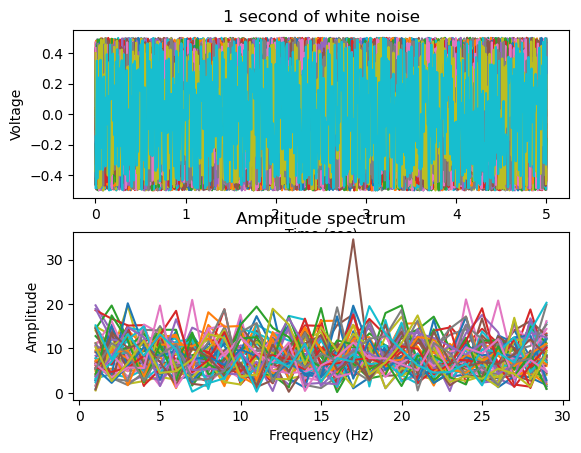

In [79]:
whitesig = np.random.uniform(low=0.0, high=1.0, size=(50,1000))-0.5 #zero centered white noise

sumspec=np.zeros((50,1000))
for trial in range(50):
    plt.subplot(2,1,1)
    plt.plot(time, whitesig[trial,:]), plt.xlabel('Time (sec)'), plt.ylabel('Voltage'), plt.title('1 second of white noise')
    fftspec = fft.fft(whitesig[trial,:]) # calculate DFT
    sumspec[trial,:] = abs(fftspec) # save it for later
    plt.subplot(2,1,2)
    plt.plot(faxis[1:30], abs(fftspec[1:30])), plt.xlabel('Frequency (Hz)'),plt.ylabel('Amplitude'),plt.title('Amplitude spectrum')


Next, we repeat that process with the cumulative sum of the white noise, which results in brownian noise. The spectrum of brownian noise is expected to have a 1/f shape, characteristic for biological (including neural) systems. We also add a brief 400-ms oscillatory response to each trial, in the middle of the 1-sec time segment (300 to 700 ms). Many authors define an oscillation as a narrow band signal, so we add a narrow band signal to each trial, but the exact frequency of the narrow band signal varies between trials. We let it vary to randomly take on values within the young adult alpha range 8 to 13 Hz. 


([<matplotlib.lines.Line2D at 0x7fd37e834700>],
 Text(0.5, 0, 'Frequency (Hz)'),
 Text(0, 0.5, 'Amplitude'),
 Text(0.5, 1.0, 'Average amplitude spectrum'))

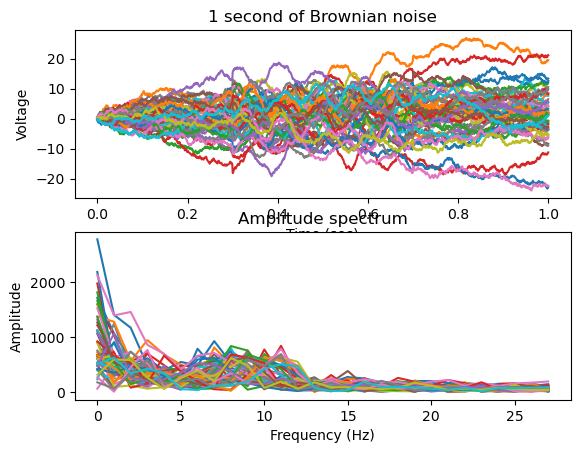

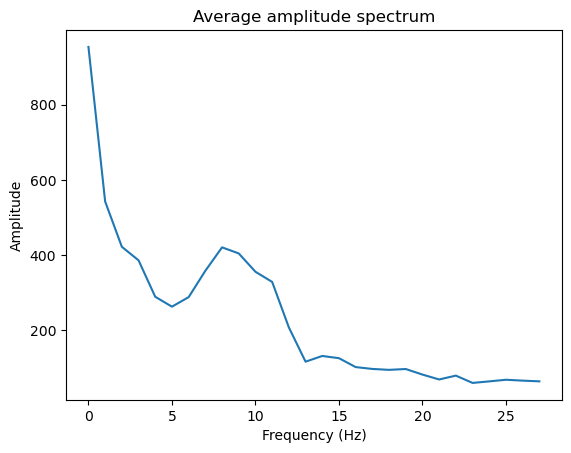

In [80]:
sumspec1=np.zeros((50,1000))
brownsig=np.zeros((50,1000))
time = np.linspace(0,1, 1000) #one second of discrete time
for trial in range(50):
    brownsig[trial,:] = np.cumsum(whitesig[trial,:]) # Brownian noise is the cumulative sum of white noise
    alphasig = np.sin(2*np.pi*time*np.random.uniform(low=8.0, high=13.0, size=1))*3 # a random alpha wave
    #print(brownsig[300:700].shape)
    brownsig[trial,300:700] = brownsig[trial,300:700] + alphasig[300:700] # add the alpha wave
    plt.subplot(2,1,1)
    plt.plot(time, brownsig[trial,:]), plt.xlabel('Time (sec)'), plt.ylabel('Voltage'), plt.title('1 second of Brownian noise')
    fftspec=fft.fft(brownsig[trial,:]) # calculate DFT
    sumspec1[trial,:] = np.abs(fftspec) # save it for later
    plt.subplot(2,1,2)
    plt.plot( np.abs(fftspec[2:30])), plt.xlabel('Frequency (Hz)'),plt.ylabel('Amplitude'),plt.title('Amplitude spectrum')

fig = plt.figure()
plt.plot(np.mean(sumspec1[:,2:30], axis=0)), plt.xlabel('Frequency (Hz)'),plt.ylabel('Amplitude'),plt.title('Average amplitude spectrum')


Is this result uniquely interpretable as evidence of variable alpha-band events in the 8 to 13 Hz range? Next, we repeat the process above, but we decrease the variability of the tempora rate of the simulated alpha band oscillations to frequencies between 10 and 11 Hz. We also shorten the duration of the oscillatory event to just 200 ms (as opposed to the 400 ms in the example in the previous field). 


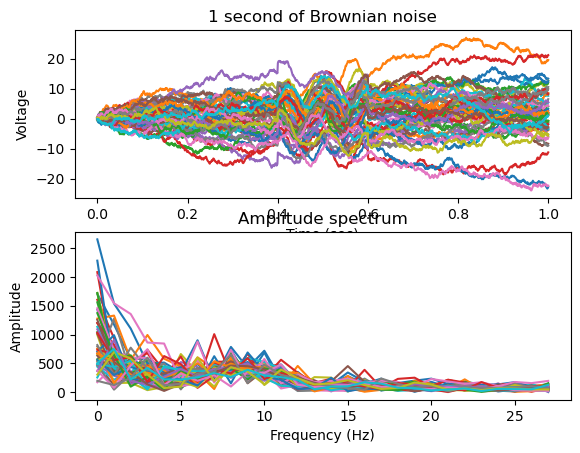

In [81]:
sumspec2=np.zeros((50,1000))
brownsig=np.zeros((50,1000))
time = np.linspace(0,1, 1000) #one second of discrete time
for trial in range(50):
    brownsig[trial,:] = np.cumsum(whitesig[trial,:]) # Brownian noise is the cumulative sum of white noise
    alphasig = np.sin(2*np.pi*time*np.random.uniform(low=10.0, high=11.0, size=1))*4 # a random alpha wave
    #print(brownsig[300:700].shape)
    brownsig[trial,400:600] = brownsig[trial,400:600] + alphasig[400:600] # add the alpha wave
    plt.subplot(2,1,1)
    plt.plot(time, brownsig[trial,:]), plt.xlabel('Time (sec)'), plt.ylabel('Voltage'), plt.title('1 second of Brownian noise')
    fftspec=fft.fft(brownsig[trial,:]) # calculate DFT
    sumspec2[trial,:] = np.abs(fftspec) # save it for later
    plt.subplot(2,1,2)
    plt.plot( np.abs(fftspec[2:30])), plt.xlabel('Frequency (Hz)'),plt.ylabel('Amplitude'),plt.title('Amplitude spectrum')


Let's compare the results. In red, the averaged spectrum (the average of 50 spectra for 50 trials) with oscillatory events in the range from 300 to 700 ms of the 1000 ms (1-second) segment, varying between 8 and 13 Hz across trials. In blue, the averaged spectrum (the average of 50 spectra for 50 trials) with oscillatory events in the range from 400 to 600 ms of the 1000 ms (1-second) segment, varying between 10 and 11 Hz across trials.


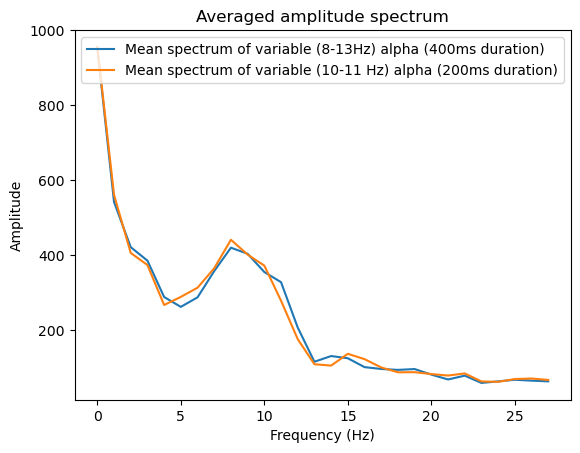

In [82]:
fig = plt.figure()
plt.plot(np.mean(sumspec1[:, 2:30], axis=0))
plt.plot(np.mean(sumspec2[:, 2:30], axis=0))
plt.xlabel('Frequency (Hz)'),plt.ylabel('Amplitude'),plt.title('Averaged amplitude spectrum')
plt.legend(['Mean spectrum of variable (8-13Hz) alpha (400ms duration)', 'Mean spectrum of variable (10-11 Hz) alpha (200ms duration)'])

The results show that in most runs (feel free to run this simulation multiple times), the two spectra cannot be reliably discriminated. 
- A shorter burst of a narrow band oscillation may look like longer bursts of a more variable oscillation, because the shorter burst cannot be localized as well in the frequency domain, and spreads out across the x-axis (frequency axis) of the spectrum. 
- Even non-oscillatory (transient) events may be misrepresented in that way. 
- Feel free to change the code in line 108 to make shorter bursts than 400:600 ms, to see the effects of a shorter amplitude modulation in the data. 

Thus, based on the shape of the averaged power spectrum alone, it is difficult to infer the causes that led to what appears to be an alpha peak in the spectrum. This lack of unique interpretability is known as the *inverse problem* and is ubiquitous in scientific measurement theory: Inferring the causes of a low-dimensional measurement is often compared to the task of guessing what 3-D object cast a 2-dimensional shadow on the wall. There are infinite numbers of objects that are capable of casting the same 2-D shadow, and thus a unique inference cannot be made without further information or assumptions. Here is a discussion of the inverse problem in source estimation: [Scholarpedia: Source Localization - An overview of all the models](http://www.scholarpedia.org/article/Source_localization#An_overview_of_all_the_models). 

The same is the case with averaged spectra. Examining the temporal dynamics of the oscillation, as well as single-trial amplitude/power spectra, and the phase spectrum are viable strategies for addressing this problem.  
